## This notebook is to explore the data of used cars from TrueCar

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%run "../data_processing/vizi"
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("../data/processed.csv",dtype={'vehicle_carfax_report_available':'object',
                                         'vehicle_multilocation':'object',
                                         'vehicle_price_dropped':'object'})

### Check scatter plots between numeric features and list price
### Key findings:
- There is a strong positive relationship between year and average list price. The average list price increases as the year of used car increases.
- There is a negative relationship(not strong) between mpg combined and average list price. The lower the mpg combined the higher the average list price.
- There is a strong negative relationship mileage range and average list price. The lower the mileage range the higher the average list price.

### vehicle_year vs vehicle_list_price
- The scatter plot shows a strong positive relationship between year and average price. The higher the year the higher the average of price.

In [3]:
df_year_price = df[['vehicle_year','vehicle_list_price']].groupby('vehicle_year').mean().reset_index()

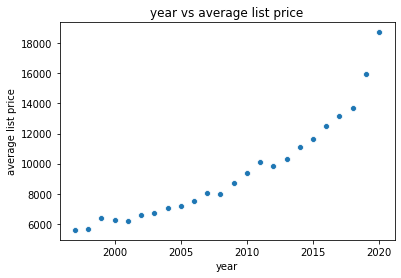

In [4]:
sns.scatterplot(x= 'vehicle_year',
                y= 'vehicle_list_price',
                data=df_year_price)
plt.title("year vs average list price")
plt.xlabel('year')
plt.ylabel('average list price')
plt.show()

### vehicle_mpg_city vs vehicle_year

In [5]:
df_mpgcity_price= df[['vehicle_mpg_city','vehicle_list_price']].groupby('vehicle_mpg_city').mean().reset_index()

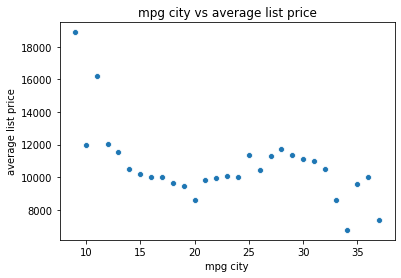

In [6]:
sns.scatterplot(x= 'vehicle_mpg_city',
                y= 'vehicle_list_price',
                data=df_mpgcity_price)
plt.title("mpg city vs average list price")
plt.xlabel('mpg city')
plt.ylabel('average list price')
plt.show()

### vehicle_mpg_combined  vs vehicle_list_price
- The scatter plot shows that there is a negative relationship(not strong) between average list price and mpg combined.

In [7]:
df_mpgcombined_price= df[['vehicle_mpg_combined','vehicle_list_price']].groupby(
    'vehicle_mpg_combined').mean().reset_index()

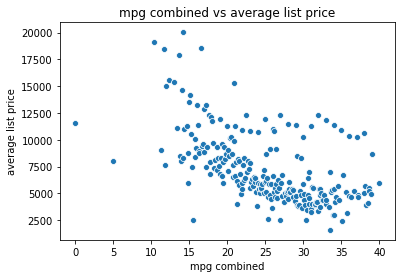

In [8]:
sns.scatterplot(x= 'vehicle_mpg_combined',
                y= 'vehicle_list_price',
                data=df_mpgcombined_price)
plt.title("mpg combined vs average list price")
plt.xlabel('mpg combined')
plt.ylabel('average list price')
plt.show()

### vehicle_mpg_highway  vs vehicle_list_price

In [9]:
df_mpghigh_price= df[['vehicle_mpg_highway','vehicle_list_price']].groupby(
    'vehicle_mpg_highway').mean().reset_index()

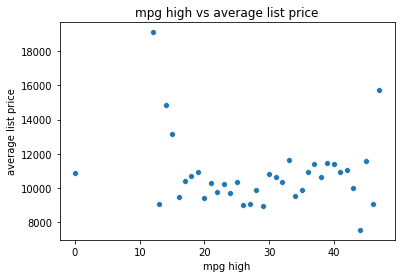

In [10]:
sns.scatterplot(x= 'vehicle_mpg_highway',
                y= 'vehicle_list_price',
                data=df_mpghigh_price)
plt.title("mpg high vs average list price")
plt.xlabel('mpg high')
plt.ylabel('average list price')
plt.show()

### vehicle_mileage  vs vehicle_list_price
- group mileage into 23 ranges
- the lower the mileage range the higher the price

In [11]:
df_mileage_price= df[['vehicle_mileage','vehicle_list_price']]

In [12]:
def group_mileage(x):
    if x > 0 and x <= 20000:
        return "1"
    elif x > 20000 and x <= 30000:
        return "2"
    elif x > 30000 and x <= 40000:
        return "3"
    elif x > 40000 and x <= 50000:
        return "4"
    elif x > 50000 and x <= 60000:
        return "5"
    elif x > 60000 and x <= 70000:
        return "6"
    elif x > 70000 and x <= 80000:
        return "7"
    elif x > 80000 and x <= 90000:
        return "8"
    elif x > 90000 and x <= 100000:
        return "9"
    elif x > 100000 and x <= 110000:
        return "10"
    elif x > 110000 and x <= 120000:
        return "11"
    elif x > 120000 and x <= 130000:
        return "12"
    elif x > 130000 and x <= 140000:
        return "13"
    elif x > 140000 and x <= 150000:
        return "14"
    elif x > 150000 and x <= 160000:
        return "15"
    elif x > 160000 and x <= 170000:
        return "16"
    elif x > 170000 and x <= 180000:
        return "17"
    elif x > 180000 and x <= 190000:
        return "18"
    elif x > 190000 and x <= 200000:
        return "19"
    elif x > 200000 and x <= 210000:
        return "20"
    elif x > 210000 and x <= 220000:
        return "21"
    elif x > 220000 and x <= 230000:
        return "22"
    else:
        return "23"

In [13]:
df_mileage_price['groups'] = df_mileage_price.vehicle_mileage.map(group_mileage)

In [14]:
df_mileage_price = df_mileage_price[['groups','vehicle_list_price']].groupby(
    'groups').mean().reset_index().sort_values(by = 'vehicle_list_price',ascending = False)

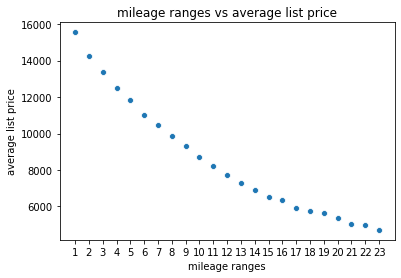

In [15]:
sns.scatterplot(x= 'groups',
                y= 'vehicle_list_price',
                data=df_mileage_price)
plt.title("mileage ranges vs average list price")
plt.xlabel('mileage ranges')
plt.ylabel('average list price')
plt.show()

## Check correlation 
#### The correlation matrix shows that
- vehicle_mpg_city, vehicle_mpg_combined, and vehicle_mpg_highway have very high correlation and this is obvious. 
- vehicle_list_price has relatively high correlation with vehicle_year

In [16]:
df_numeric = df.select_dtypes(exclude='object')
col_id = [col for col in df.columns if col.endswith('id')]
df_plot = df_numeric.copy()
df_plot.drop(col_id,axis = 1,inplace= True)
df_plot.drop(['dealership_location_lat',
                 'dealership_location_lng','dealership_location_postal_code'],axis = 1,inplace= True)

list_price = df_plot.vehicle_list_price
df_plot.drop('vehicle_list_price',axis = 1, inplace = True)
df_plot.insert(0,'vehicle_list_price',list_price)

In [17]:
df_plot.corr().abs()

,vehicle_list_price,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_year,vehicle_member_discount,vehicle_mileage
vehicle_list_price,1.000000,0.075771,0.055539,0.073656,0.597183,0.147003,0.674575
vehicle_mpg_city,0.075771,1.000000,0.975654,0.944285,0.553449,0.014428,0.494234
vehicle_mpg_combined,0.055539,0.975654,1.000000,0.962748,0.536304,0.016983,0.489100
vehicle_mpg_highway,0.073656,0.944285,0.962748,1.000000,0.575879,0.007854,0.513095
vehicle_year,0.597183,0.553449,0.536304,0.575879,1.000000,0.073376,0.720362
vehicle_member_discount,0.147003,0.014428,0.016983,0.007854,0.073376,1.000000,0.095721
vehicle_mileage,0.674575,0.494234,0.489100,0.513095,0.720362,0.095721,1.000000


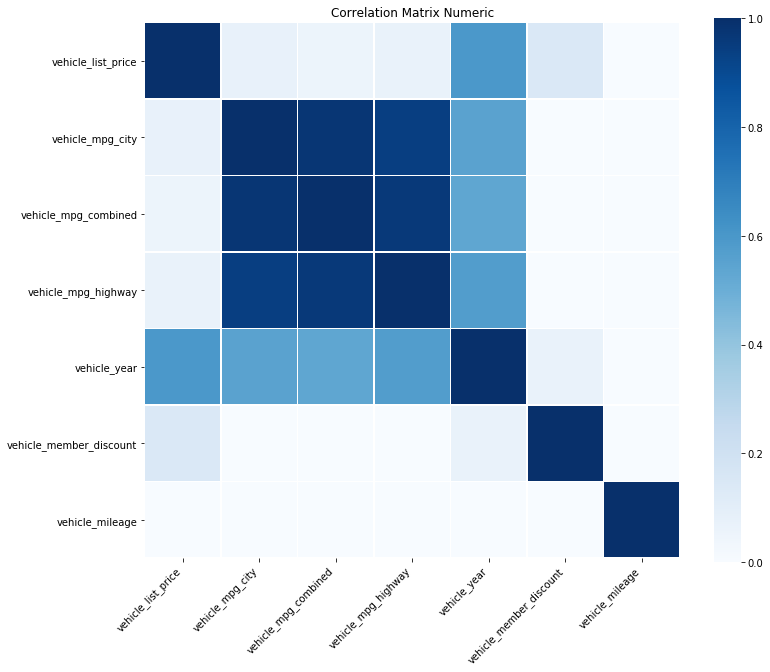

In [18]:
check_correlation(df_plot)

### Drop the following features since they have the same meaning with their id.
vehicle_make
vehicle_model
vehicle_style

In [19]:
df.drop(["vehicle_make",
"vehicle_model",
"vehicle_style"],axis = 1,inplace = True)

In [20]:
df.head(1)

,vehicle_body_style,vehicle_drive_train,vehicle_engine,vehicle_fuel_type,vehicle_make_id,vehicle_model_id,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_style_id,vehicle_transmission,vehicle_trim,vehicle_year,vehicle_chrome_trim_id,vehicle_carfax_report_available,vehicle_enable_discount,vehicle_exterior_color_generic,vehicle_exterior_color_rgb,vehicle_exterior_color,vehicle_interior_color,vehicle_list_price,vehicle_member_discount,vehicle_mileage,vehicle_new_or_used,vehicle_multilocation,vehicle_location,vehicle_price_dropped,dealership_id,dealership_name,dealership_location_postal_code,dealership_location_lat,dealership_location_lng,dealership_location_city,dealership_location_state
0,hatchback,FWD,1.4L Inline-4 Gas,Gas,55,8446,30.0,33.0,38.0,65120.0,Automatic,ls,2020,405609.0,True,no,Gray,515660,Nightfall Grey,Jet Black/Jet Black,10742.0,0.0,598,USED,False,"Richardson, TX",False,3185,Reliable Chevrolet TX,75080,32.94195,-96.74401,Richardson,TX


In [21]:
df_obj = df.select_dtypes('object')

### Found lots of features that has thousands of categories
- for now, keep features with number of categories that less than 52

In [22]:
for column in df_obj.columns:
    print("-" * 100)
    print(f'{column} has {df_obj[column].nunique()} unique category')

----------------------------------------------------------------------------------------------------
vehicle_body_style has 11 unique category
----------------------------------------------------------------------------------------------------
vehicle_drive_train has 4 unique category
----------------------------------------------------------------------------------------------------
vehicle_engine has 192 unique category
----------------------------------------------------------------------------------------------------
vehicle_fuel_type has 4 unique category
----------------------------------------------------------------------------------------------------
vehicle_transmission has 2 unique category
----------------------------------------------------------------------------------------------------
vehicle_trim has 1334 unique category
----------------------------------------------------------------------------------------------------
vehicle_carfax_report_available has 2 unique cate

In [23]:
#need_columns = [column for column in df_obj.columns if df_obj[column].nunique()< 18]

### Ok..Found a feature vehicle_new_or_used which is useless.

In [24]:
df_obj = df_obj.drop('vehicle_new_or_used',axis = 1)

In [25]:
df_combine = pd.concat([df_numeric,df_obj], axis =1)

### Drop high correlation features
- vehicle_mpg_city
- vehicle_mpg_highway

In [26]:
df_combine.drop(['vehicle_mpg_city','vehicle_mpg_highway'],axis = 1, inplace = True)

In [27]:
df_combine.head(2)

,vehicle_make_id,vehicle_model_id,vehicle_mpg_combined,vehicle_style_id,vehicle_year,vehicle_chrome_trim_id,vehicle_list_price,vehicle_member_discount,vehicle_mileage,dealership_id,dealership_location_postal_code,dealership_location_lat,dealership_location_lng,vehicle_body_style,vehicle_drive_train,vehicle_engine,vehicle_fuel_type,vehicle_transmission,vehicle_trim,vehicle_carfax_report_available,vehicle_enable_discount,vehicle_exterior_color_generic,vehicle_exterior_color_rgb,vehicle_exterior_color,vehicle_interior_color,vehicle_multilocation,vehicle_location,vehicle_price_dropped,dealership_name,dealership_location_city,dealership_location_state
0,55,8446,33.0,65120.0,2020,405609.0,10742.0,0.0,598,3185,75080,32.94195,-96.74401,hatchback,FWD,1.4L Inline-4 Gas,Gas,Automatic,ls,True,no,Gray,515660,Nightfall Grey,Jet Black/Jet Black,False,"Richardson, TX",False,Reliable Chevrolet TX,Richardson,TX
1,55,8446,33.0,65120.0,2020,405609.0,10991.0,0.0,1004,3185,75080,32.94195,-96.74401,hatchback,FWD,1.4L Inline-4 Gas,Gas,Automatic,ls,True,no,Tan,E1D8D1,Toasted Marshmallow,Jet Black/Jet Black,False,"Richardson, TX",False,Reliable Chevrolet TX,Richardson,TX


In [28]:
list(df_combine.columns)

['vehicle_make_id',
 'vehicle_model_id',
 'vehicle_mpg_combined',
 'vehicle_style_id',
 'vehicle_year',
 'vehicle_chrome_trim_id',
 'vehicle_list_price',
 'vehicle_member_discount',
 'vehicle_mileage',
 'dealership_id',
 'dealership_location_postal_code',
 'dealership_location_lat',
 'dealership_location_lng',
 'vehicle_body_style',
 'vehicle_drive_train',
 'vehicle_engine',
 'vehicle_fuel_type',
 'vehicle_transmission',
 'vehicle_trim',
 'vehicle_carfax_report_available',
 'vehicle_enable_discount',
 'vehicle_exterior_color_generic',
 'vehicle_exterior_color_rgb',
 'vehicle_exterior_color',
 'vehicle_interior_color',
 'vehicle_multilocation',
 'vehicle_location',
 'vehicle_price_dropped',
 'dealership_name',
 'dealership_location_city',
 'dealership_location_state']

### Pick the following features and encode nominal categorical features

In [29]:
need_columns = [
'vehicle_make_id',
'vehicle_model_id',
'vehicle_mpg_combined',
'vehicle_style_id',
'vehicle_year',
'vehicle_chrome_trim_id',
'vehicle_list_price',
'vehicle_member_discount',
'vehicle_mileage',
'dealership_id',
'dealership_location_postal_code',
'dealership_location_lat',
'dealership_location_lng',
'vehicle_body_style',
'vehicle_drive_train',
'vehicle_fuel_type',
'vehicle_transmission',
'vehicle_carfax_report_available',
'vehicle_enable_discount',
'vehicle_multilocation',
'vehicle_price_dropped']

In [30]:
df_feature = df_combine.loc[:,need_columns]

In [31]:
df_feature = pd.get_dummies(df_feature,drop_first=True)

In [32]:
df_feature.shape

(134451, 35)

In [33]:
df_feature.head(2)

,vehicle_make_id,vehicle_model_id,vehicle_mpg_combined,vehicle_style_id,vehicle_year,vehicle_chrome_trim_id,vehicle_list_price,vehicle_member_discount,vehicle_mileage,dealership_id,dealership_location_postal_code,dealership_location_lat,dealership_location_lng,vehicle_body_style_chassis-cab-truck,vehicle_body_style_convertible,vehicle_body_style_coupe,vehicle_body_style_hatchback,vehicle_body_style_minivan,vehicle_body_style_passenger-van,vehicle_body_style_pickup-truck,vehicle_body_style_sedan,vehicle_body_style_suv,vehicle_body_style_wagon,vehicle_drive_train_AWD,vehicle_drive_train_FWD,vehicle_drive_train_RWD,vehicle_fuel_type_Diesel,vehicle_fuel_type_Gas,vehicle_fuel_type_Hybrid,vehicle_transmission_Manual,vehicle_carfax_report_available_True,vehicle_enable_discount_yes_all_tc,vehicle_enable_discount_yes_member,vehicle_multilocation_True,vehicle_price_dropped_True
0,55,8446,33.0,65120.0,2020,405609.0,10742.0,0.0,598,3185,75080,32.94195,-96.74401,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,55,8446,33.0,65120.0,2020,405609.0,10991.0,0.0,1004,3185,75080,32.94195,-96.74401,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [34]:
df_feature.to_csv('../data/featuressimple.csv',index = False)